<a href="https://colab.research.google.com/github/Vaishnavi-Parashar/subscription-trap-analysis/blob/main/subscription_trap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df=pd.read_csv('netflix_viewing.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [12]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [13]:
df_useful = df [['Profile Name','Start Time','Duration','Title','Device Type','Country']]
df_useful.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,IN (India)


In [14]:
df_useful.columns = [
    'profile',
    'start_time',
    'duration',
    'title',
    'device_type',
    'country'
]

df_useful.head()


,profile,start_time,duration,title,device_type,country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,IN (India)


In [19]:
df_useful['duration_minutes'] = (
    pd.to_timedelta(df_useful['duration'])
    .dt.total_seconds()
    /60
)
df_useful[['duration','duration_minutes']].head()

/tmp/ipython-input-1613832521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['duration_minutes'] = (


,duration,duration_minutes
0,00:00:06,0.10
1,00:09:39,9.65
2,00:00:06,0.10
3,00:00:15,0.25
4,00:01:45,1.75


In [20]:
df_useful = df_useful[df_useful['duration_minutes'] >= 1]

df_useful.shape


(7076, 7)

In [21]:
total_minutes=df_useful['duration_minutes'].sum()
total_minutes

np.float64(148159.0)

In [22]:
total_hours=total_minutes/60
total_hours

np.float64(2469.3166666666666)

In [24]:
top_title =(
    df_useful.groupby('title')['duration_minutes']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_title

,duration_minutes
title,
Minnal Murali,1618.366667
CBI 5: The Brain,1206.033333
Jana Gana Mana,921.716667
Kuttavum Shikshayum,724.683333
Kumari,684.816667
Doctor (Tamil),625.950000
Gangubai Kathiawadi,560.883333
Kurup (Malayalam),541.766667
Don't Look Up,535.450000


In [42]:
# average watch time per session
avg_watch_time =df_useful['duration_minutes'].mean()
avg_watch_time

np.float64(20.93824194460147)

In [43]:
#assume netflix montly cost
netflix_cost=199
cost_per_hour=netflix_cost/total_hours
cost_per_hour

np.float64(0.08058909684865584)

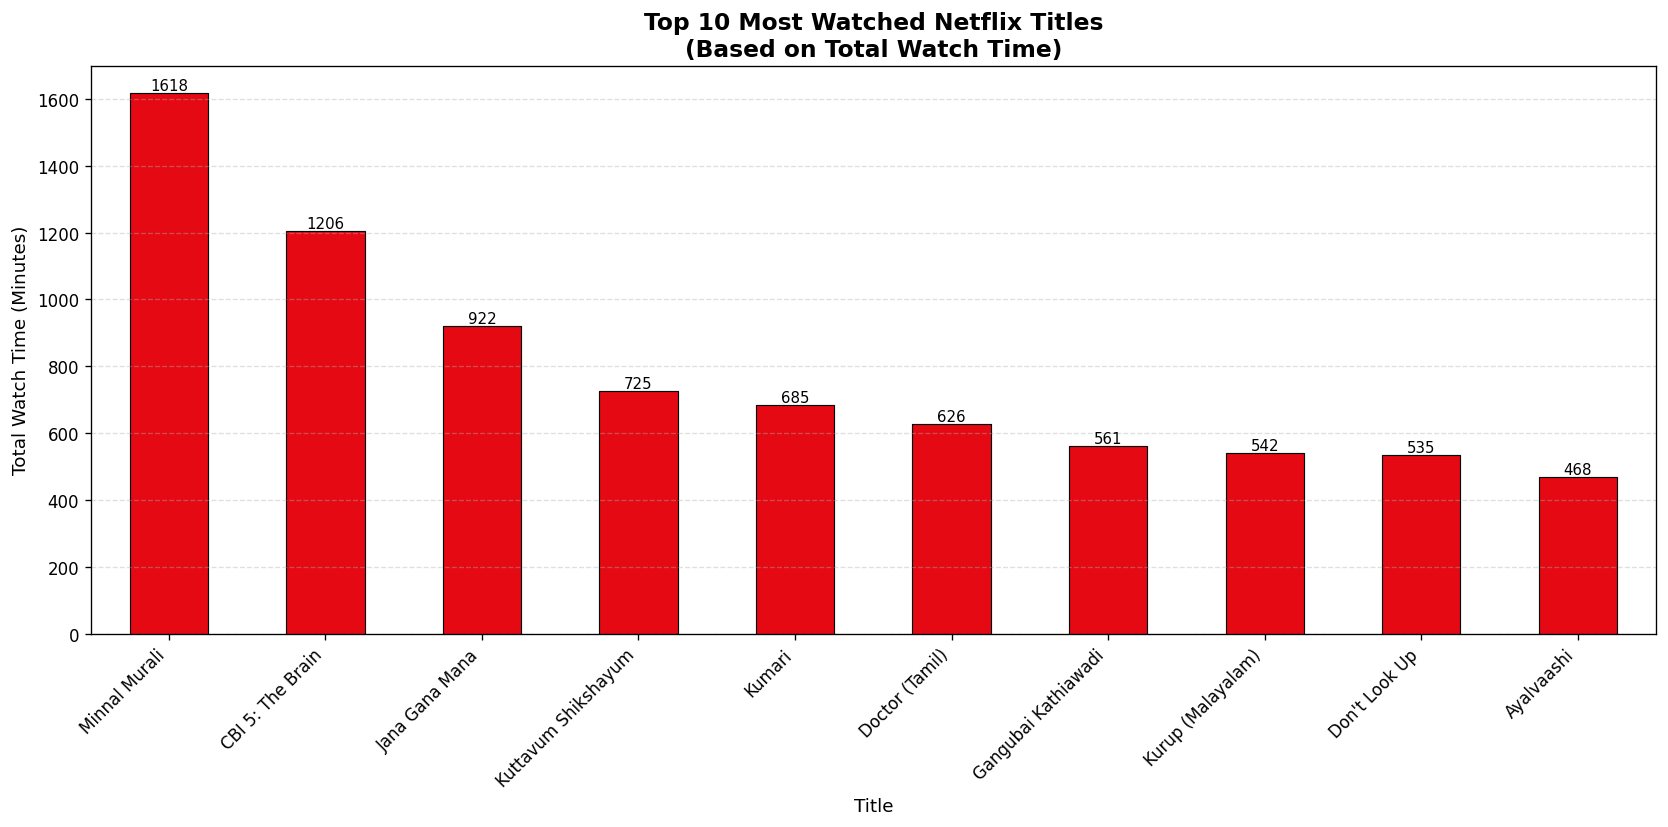

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7), dpi=120)

top_title.plot(
    kind='bar',
    color='#E50914',          # Netflix red
    edgecolor='black',
    linewidth=0.7
)

plt.title(
    'Top 10 Most Watched Netflix Titles\n(Based on Total Watch Time)',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Title', fontsize=11)
plt.ylabel('Total Watch Time (Minutes)', fontsize=11)

plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add data labels on top of bars
for index, value in enumerate(top_title.values):
    plt.text(
        index,
        value,
        f'{value:.0f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


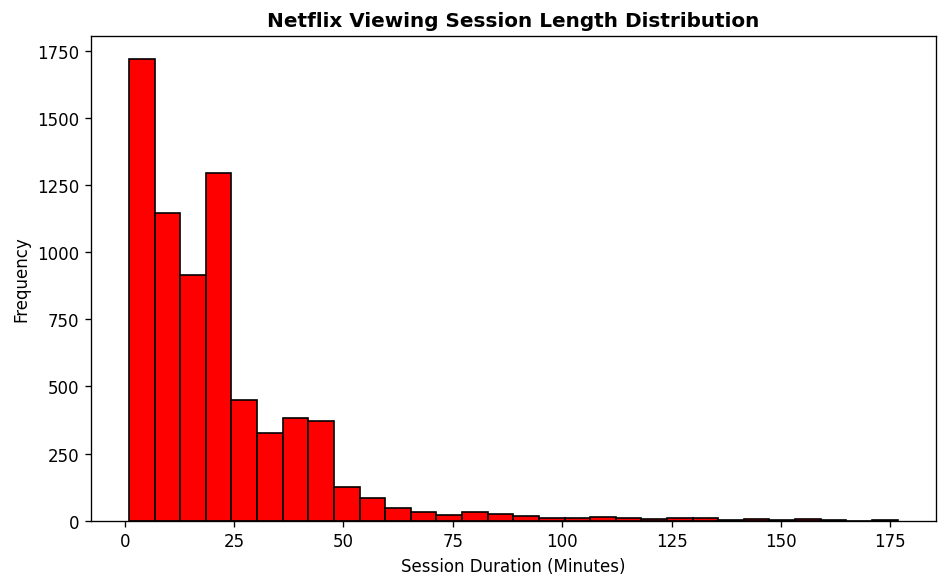

In [80]:
plt.figure(figsize=(8,5), dpi=120)
plt.hist(df_useful['duration_minutes'], bins=30, edgecolor='black',color='red')

plt.title('Netflix Viewing Session Length Distribution', fontweight='bold')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


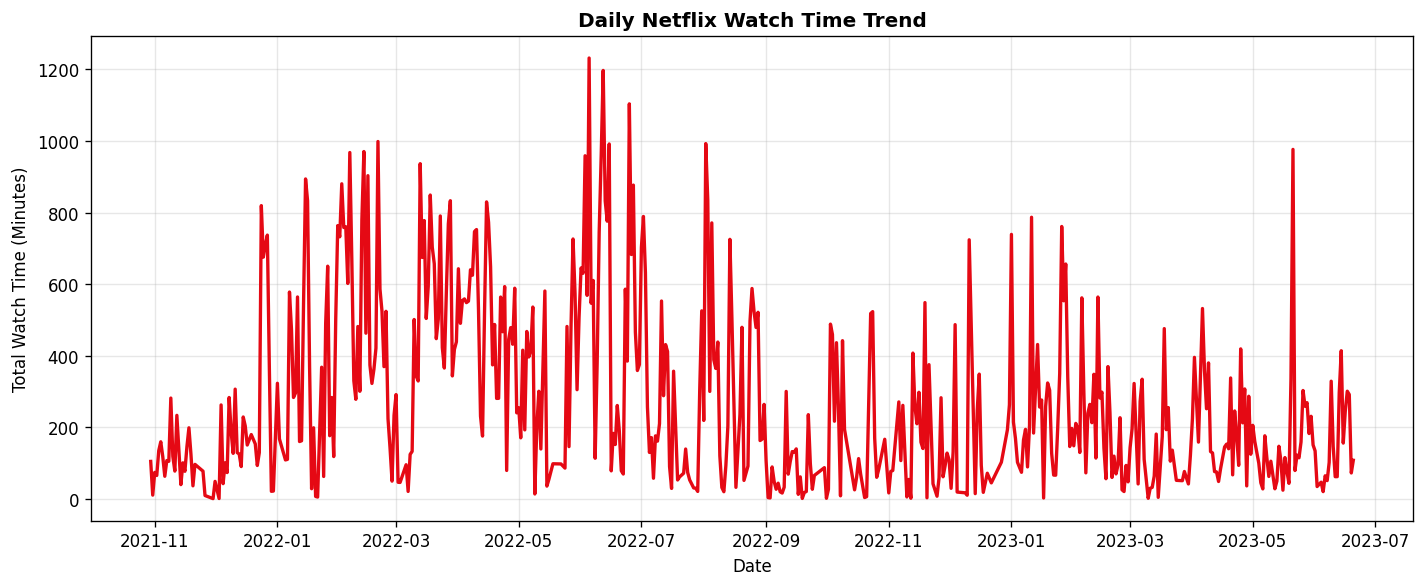

In [79]:
df_useful['date'] = pd.to_datetime(df_useful['start_time']).dt.date

daily_watch = (
    df_useful.groupby('date')['duration_minutes']
    .sum()
)

plt.figure(figsize=(12,5), dpi=120)
plt.plot(daily_watch, linewidth=2, color='#E50914')

plt.title('Daily Netflix Watch Time Trend', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (Minutes)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
spotify_df=pd.read_csv('spotify_history.csv')
spotify_df
spotify_df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [46]:
spotify_df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [49]:
spotify_useful = spotify_df[
    [
        'ts',
        'track_name',
        'artist_name',
        'album_name',
        'ms_played',
        'platform',
        'skipped'
    ]
]

In [50]:
spotify_useful.head()

,ts,track_name,artist_name,album_name,ms_played,platform,skipped
0,2013-07-08 02:44:34,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,3185,web player,False
1,2013-07-08 02:45:37,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,61865,web player,False
2,2013-07-08 02:50:24,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,285386,web player,False
3,2013-07-08 02:52:40,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,134022,web player,False
4,2013-07-08 03:17:52,Half Mast,Empire Of The Sun,Walking On A Dream,0,web player,False


In [51]:
spotify_useful.columns=[
    'time',
    'track',
    'artist',
    'album',
    'ms_played',
    'platform',
    'skipped'
]
spotify_useful.head()

,time,track,artist,album,ms_played,platform,skipped
0,2013-07-08 02:44:34,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,3185,web player,False
1,2013-07-08 02:45:37,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,61865,web player,False
2,2013-07-08 02:50:24,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,285386,web player,False
3,2013-07-08 02:52:40,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,134022,web player,False
4,2013-07-08 03:17:52,Half Mast,Empire Of The Sun,Walking On A Dream,0,web player,False


In [52]:
spotify_useful['minutes_played'] = spotify_useful['ms_played']/(1000 * 60)
spotify_useful.head()

/tmp/ipython-input-3603427802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_useful['minutes_played'] = spotify_useful['ms_played']/(1000 * 60)


,time,track,artist,album,ms_played,platform,skipped,minutes_played
0,2013-07-08 02:44:34,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,3185,web player,False,0.053083
1,2013-07-08 02:45:37,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,61865,web player,False,1.031083
2,2013-07-08 02:50:24,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,285386,web player,False,4.756433
3,2013-07-08 02:52:40,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,134022,web player,False,2.233700
4,2013-07-08 03:17:52,Half Mast,Empire Of The Sun,Walking On A Dream,0,web player,False,0.000000


In [53]:
spotify_useful[['ms_played', 'minutes_played']].head()

,ms_played,minutes_played
0,3185,0.053083
1,61865,1.031083
2,285386,4.756433
3,134022,2.233700
4,0,0.000000


In [54]:
spotify_useful = spotify_useful[spotify_useful['minutes_played'] >= 1]

spotify_useful.shape


(89018, 8)

In [55]:
top_tracks = (
    spotify_useful.groupby('track')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_tracks


,minutes_played
track,
Ode To The Mets,1118.647983
"The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)",1071.765250
"The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)",742.868400
19 Dias y 500 Noches - En Directo,714.397050
In the Blood,636.237700
Claudia's Theme - Version Eight,617.862483
Dying Breed,598.719967
"The Breaking of the Fellowship (feat. ""In Dreams"")",596.818067
All These Things That I've Done,594.145700


In [57]:
top_artists = (
    spotify_useful.groupby('artist')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_artists


,minutes_played
artist,
The Beatles,19402.813967
The Killers,17363.156433
John Mayer,11897.723000
Bob Dylan,9311.007967
Paul McCartney,5800.393600
Howard Shore,5772.170483
The Strokes,5229.121250
The Rolling Stones,4997.974583
Pink Floyd,4243.047667


In [61]:
spotify_useful.columns


Index(['time', 'track', 'artist', 'album', 'ms_played', 'platform', 'skipped',
       'minutes_played'],
      dtype='object')

In [62]:
spotify_useful['listening_minutes'] = spotify_useful['ms_played'] / 60000


In [63]:
spotify_useful[['ms_played', 'listening_minutes']].head()


,ms_played,listening_minutes
1,61865,1.031083
2,285386,4.756433
3,134022,2.233700
5,63485,1.058083
10,67587,1.126450


In [64]:
spotify_clean = spotify_useful[spotify_useful['listening_minutes'] >= 0.5]


In [65]:
spotify_clean.columns
spotify_clean.shape


(89018, 9)

In [66]:
spotify_clean['listening_minutes'].sum()


np.float64(312913.05888333335)

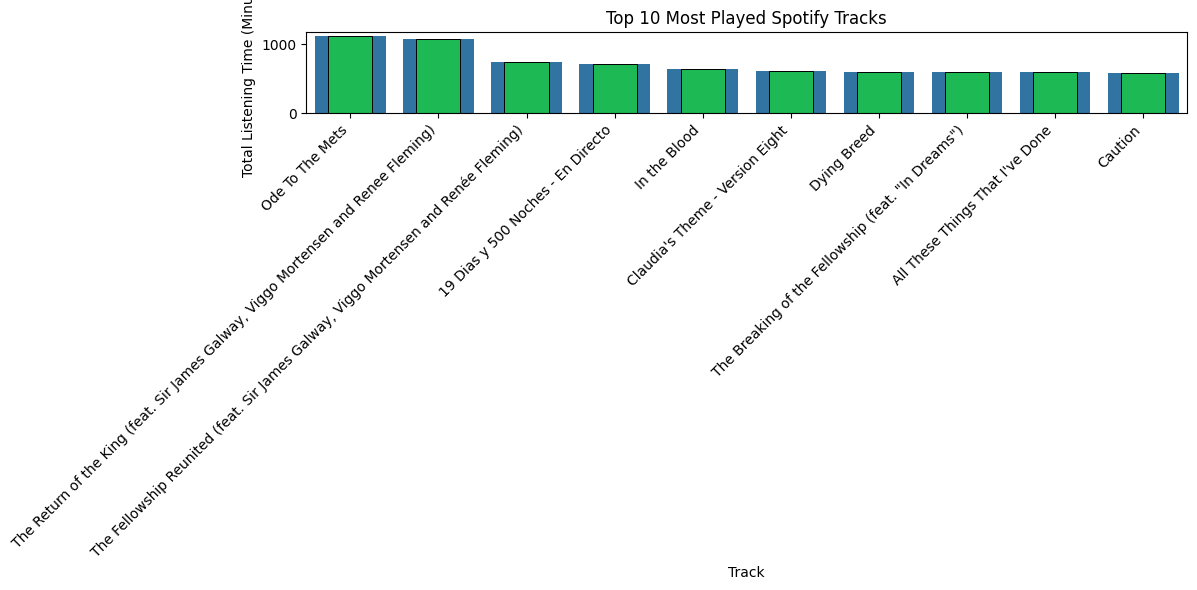

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_tracks.index,
    y=top_tracks.values
)
top_tracks.plot(
    kind='bar',
    color='#1DB954',      # Spotify green
    edgecolor='black',
    linewidth=0.7
)
plt.title('Top 10 Most Played Spotify Tracks')
plt.xlabel('Track')
plt.ylabel('Total Listening Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


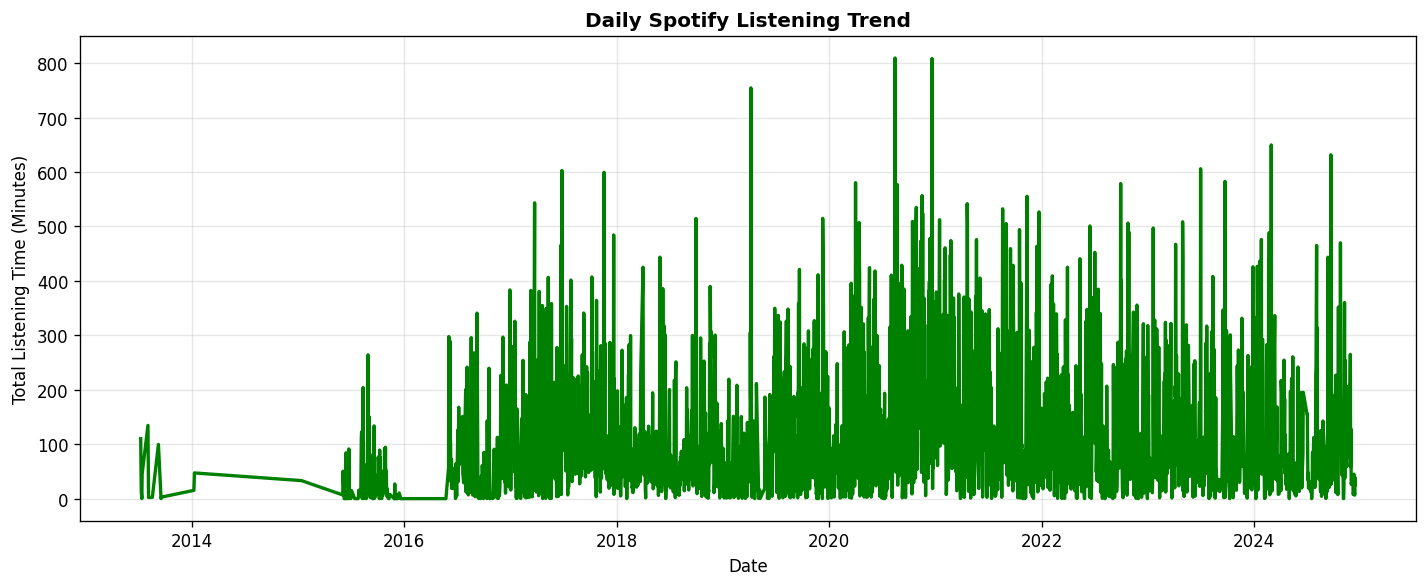

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

spotify_df['date'] = pd.to_datetime(spotify_df['ts']).dt.date

daily_minutes = (
    spotify_df.groupby('date')['ms_played']
    .sum() / 60000
)

plt.figure(figsize=(12,5), dpi=120)
plt.plot(daily_minutes, linewidth=2,color='green')

plt.title('Daily Spotify Listening Trend', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Listening Time (Minutes)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


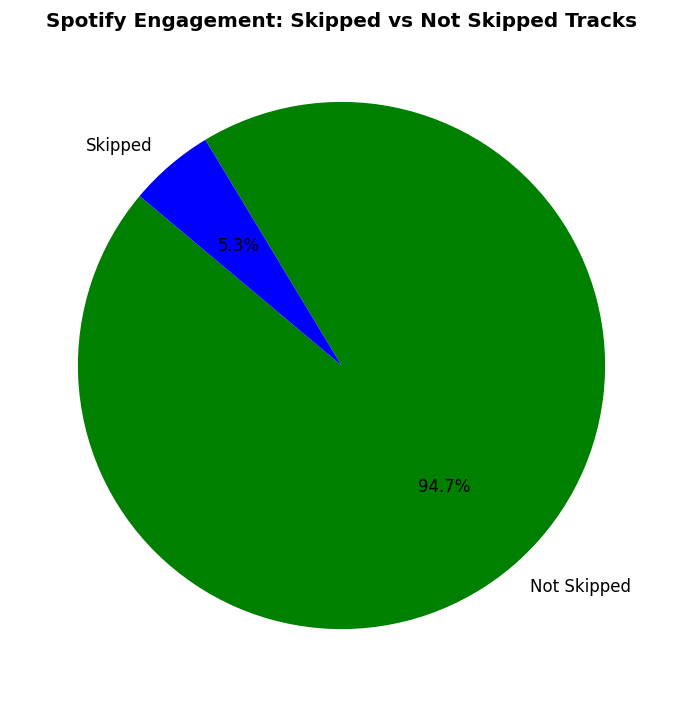

In [84]:
skip_counts = spotify_df['skipped'].value_counts()
labels = ['Not Skipped', 'Skipped']

plt.figure(figsize=(6,6), dpi=120)
plt.pie(
    skip_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['green','blue']
)

plt.title('Spotify Engagement: Skipped vs Not Skipped Tracks', fontweight='bold')
plt.tight_layout()
plt.show()


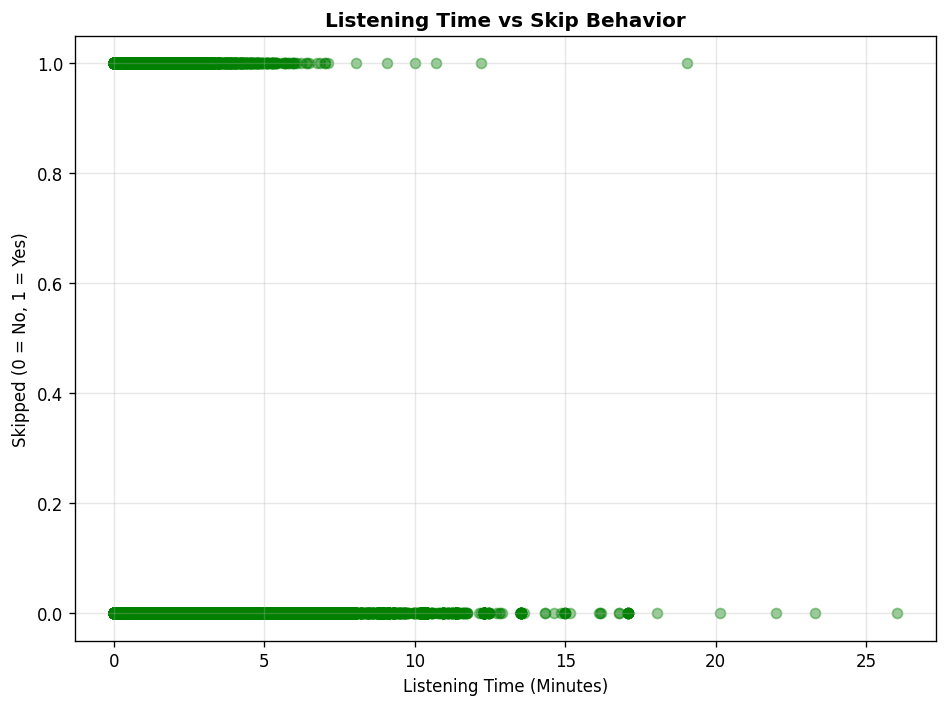

In [83]:
plt.figure(figsize=(8,6), dpi=120)

plt.scatter(
    spotify_df['ms_played'] / 60000,
    spotify_df['skipped'],
    alpha=0.4,
    color='green'
)

plt.xlabel('Listening Time (Minutes)')
plt.ylabel('Skipped (0 = No, 1 = Yes)')
plt.title('Listening Time vs Skip Behavior', fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
